# Kernel Density Estimation (KDE)

In [34]:
# Método similar al histograma, nos ayuda a conocer la distribución de nuestros datos
# Con la ventaja de que nos proporciona una curba de densidad de probabilidad continua
# lo que permite una interpretación mas fácil, sobretodo cuando se incluyen distribuciones 
# de múltiples variables en un mismo gráfico.

In [35]:
# importamos librerias

import pandas as pd

In [36]:
# importamos dataset

In [37]:
corredores = pd.read_csv('categorias de corredores.csv', index_col = 0)

In [38]:
corredores

,Lugar,Genero,Edad,Pais,Tiempo,Velocidad
Corredor,,,,,,
3475,3592,Male,52,GBR,217.483333,Regular
13594,13853,Female,40,NY,272.550000,Regular
12012,12256,Male,31,FRA,265.283333,Regular
10236,10457,Female,33,MI,256.150000,Regular
9476,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...
15972,16261,Male,61,FRA,285.883333,Regular
1090,1131,Male,37,GBR,191.916667,Veloz
16419,16713,Female,53,IRL,289.016667,Regular


In [39]:
corredores.head()

,Lugar,Genero,Edad,Pais,Tiempo,Velocidad
Corredor,,,,,,
3475,3592,Male,52,GBR,217.483333,Regular
13594,13853,Female,40,NY,272.550000,Regular
12012,12256,Male,31,FRA,265.283333,Regular
10236,10457,Female,33,MI,256.150000,Regular
9476,9686,Male,33,NY,252.250000,Regular


In [55]:
corredores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 3475 to 8527
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lugar      1000 non-null   int64  
 1   Genero     1000 non-null   object 
 2   Edad       1000 non-null   int64  
 3   Pais       999 non-null    object 
 4   Tiempo     1000 non-null   float64
 5   Velocidad  1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 54.7+ KB


In [40]:
# Obtenemos la información de los corredores que hayan registrado una velocidad regular

In [41]:
regular = corredores.loc[(corredores['Velocidad'] == 'Regular'), ['Velocidad', 'Edad']]
regular

,Velocidad,Edad
Corredor,,
3475,Regular,52
13594,Regular,40
12012,Regular,31
10236,Regular,33
9476,Regular,33
...,...,...
4079,Regular,27
15972,Regular,61
16419,Regular,53


In [42]:
# CREAMOS EL HISTOGRAMA

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

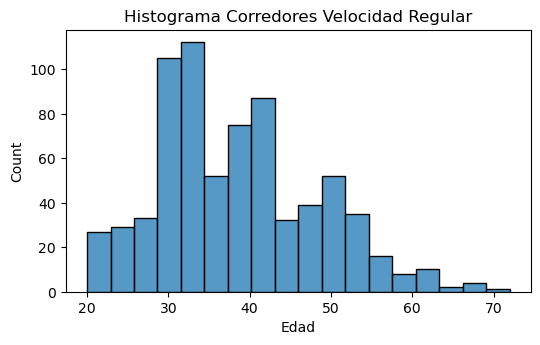

In [44]:
sns.histplot(data = regular['Edad'])
plt.title("Histograma Corredores Velocidad Regular")
plt.show

In [45]:
# Le pedimos que además del histograma nos muestre el gráfico de densidad KDE

<function matplotlib.pyplot.show(close=None, block=None)>

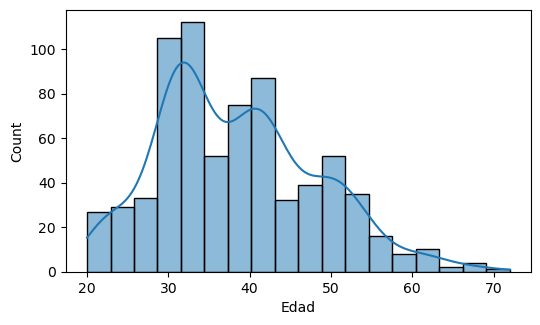

In [46]:
plt.rcParams["figure.figsize"] = (6, 3.4)

sns.histplot(data = regular['Edad'], kde = True)
plt.show

In [47]:
# Obtenemos solamente el Gráfico de Densidad generado mediante el método KDE

/var/folders/n2/l6w269493p7523tn0555krbm0000gn/T/ipykernel_89809/1676115876.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = regular['Edad'], color = 'g', shade = True)


<function matplotlib.pyplot.show(close=None, block=None)>

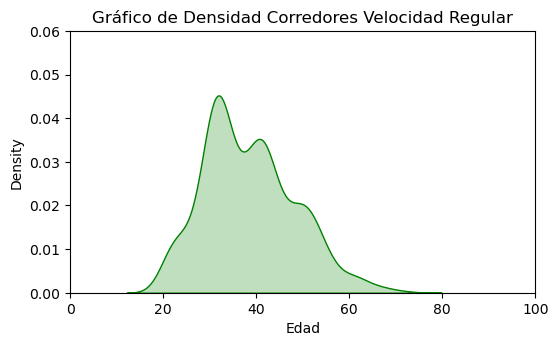

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.kdeplot(data = regular['Edad'], color = 'g', shade = True)

ax.set_ylim(0, 0.06)
ax.set_xlim(0, 100)
ax.set_title("Gráfico de Densidad Corredores Velocidad Regular")

plt.show

In [49]:
# Obteniendo el histograma con su gráfico de densidad filtrando la información del código

In [50]:
corredores.loc[(corredores['Velocidad'] == 'Lento'), 'Edad']

Corredor
18933    48
20116    33
23043    71
19584    39
21293    39
         ..
22642    69
22691    51
20188    29
20530    29
23273    46
Name: Edad, Length: 213, dtype: int64

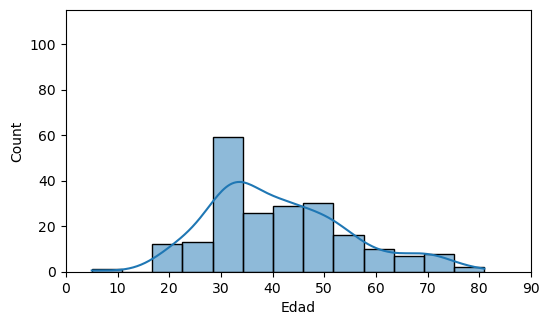

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(data = corredores.loc[(corredores['Velocidad'] == 'Lento'), 'Edad'], kde = True)
ax.set_ylim(0, 115)
ax.set_xlim(0, 90)

plt.show()

In [53]:
numero_observaciones = corredores['Tiempo'].count()

In [54]:
numero_observaciones

1000

In [56]:
# Desplegar todas las curvas de densidad de las tres categorias en un 
# solo gráfico para poder compararlas:

/var/folders/n2/l6w269493p7523tn0555krbm0000gn/T/ipykernel_89809/957837479.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = corredores, x = 'Edad', hue = 'Velocidad', shade = True)


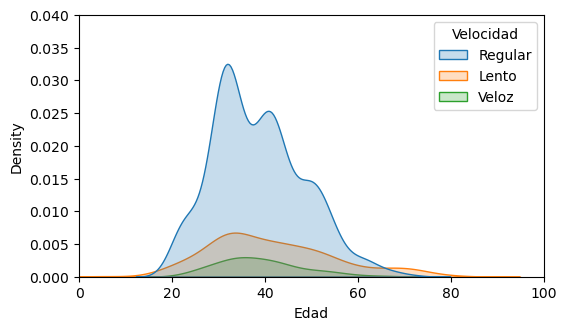

In [57]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

sns.kdeplot(data = corredores, x = 'Edad', hue = 'Velocidad', shade = True)

ax.set_ylim(0, 0.04)
ax.set_xlim(0, 100)

plt.show()

In [58]:
# Desplegamos la información correspondiente a la variable tiempo

/var/folders/n2/l6w269493p7523tn0555krbm0000gn/T/ipykernel_89809/4239300508.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = corredores, x = 'Tiempo', hue = 'Velocidad', shade = True)


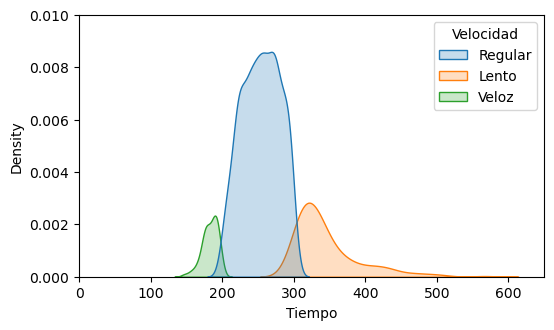

In [60]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

sns.kdeplot(data = corredores, x = 'Tiempo', hue = 'Velocidad', shade = True)

ax.set_ylim(0, 0.01)
ax.set_xlim(0, 650)

plt.show()

In [61]:
# GRÁFICO de DENSIDAD tomando en cuenta 2 Variables:

/var/folders/n2/l6w269493p7523tn0555krbm0000gn/T/ipykernel_89809/1356309709.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = corredores, y = 'Tiempo', x = 'Edad', hue = 'Velocidad', shade = True)


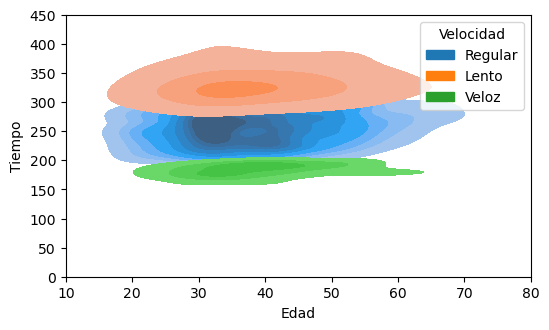

In [62]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

sns.kdeplot(data = corredores, y = 'Tiempo', x = 'Edad', hue = 'Velocidad', shade = True)

ax.set_ylim(0, 450)
ax.set_xlim(10, 80)

plt.show()

In [ ]:
# Ahora tambien podemos ver con color más oscuro, los valores más frecuentes.